# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Lee Jones
https://github.com/IamLimaEchoEcho

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [9]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()
untouchedtext = soup.get_text()

# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = '\n'.join(chunk for chunk in chunks if chunk)


In [12]:
#used to test/verify the output in text
#print(text)
#print(untouchedtext)

In [7]:
import pickle
#Send text to pickle file

with open('mod6.pkl', 'wb') as f:
  pickle.dump(text, f)

with open('mod6u.pkl', 'wb') as f:
  pickle.dump(untouchedtext, f)

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [15]:
# load
with open('mod6.pkl', 'rb') as f:
    str_soup = pickle.load(f)
    re_soup = BeautifulSoup(str_soup, 'lxml')


# I didn't like all the extra HTML code, and wanted to re-clean it back up a bit.  

# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
re_soup = '\n'.join(chunk for chunk in chunks if chunk)

print(re_soup)

How Laser Headlights Work | Hackaday
35 captures
22 Mar 2021 - 25 Oct 2022
Feb
MAR
Aug
27
2020
2021
2022
success
fail
About this capture
COLLECTED BY
Organization: Internet Archive
Focused crawls are collections of frequently-updated webcrawl data from narrow (as opposed to broad or wide) web crawls, often focused on a single domain or subdomain.
Collection: top_domains-00250
TIMESTAMPS
The Wayback Machine - https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/
Skip to content
Hackaday
Primary Menu
Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About
Search for:
March 27, 2021
How Laser Headlights Work
130 Comments
by:
Lewin Day
March 22, 2021
When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world worki

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [71]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load('en_core_web_sm')

In [56]:
from collections import Counter

my_doc = nlp(re_soup)

# Remove stop words and punctuation symbols
words = [token.text for token in my_doc
         if not token.is_stop and not token.is_punct and not token.text=='\n' and not token.text.isnumeric()]
word_freq = Counter(words)

# 5 commonly occurring words with their frequencies
common_words = word_freq.most_common(5)
top_tokens = common_words
print ('The top tokens are: ',top_tokens)

# Unique words
#unique_words = [word for (word, freq) in word_freq.items() if freq == 1]
#print (unique_words)

The top tokens are:  [('comment', 133), ('March', 132), ('says', 132), ('Report', 130), ('Reply', 111)]


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [57]:
#top_lemmas = ['laser', 'headlight', 'beam', 'technology', 'light']

## import the libraries
from spacy.lookups import Lookups

# Remove stop words and punctuation symbols
words = [token.lemma_ for token in my_doc
         if not token.is_stop and not token.is_punct and not token.text=='\n' and not token.text.isnumeric()]
word_freq = Counter(words)
# 5 commonly occurring lemmas with their frequencies
common_lemmas = word_freq.most_common(5)
top_lemmas = common_lemmas
print ('The top lemmas are: ',top_lemmas)

# Unique words
#unique_words = [word for (word, freq) in word_freq.items() if freq == 1]
#print (unique_words)

The top lemmas are:  [('comment', 157), ('say', 133), ('March', 132), ('Report', 130), ('Reply', 111)]


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [83]:
interesting_sentence = "This is a very interesting sentence written and completed by Lee Jones and it is helping me get closer to completing this assignment."
interesting_tokens = ['interesting', 'very', 'completed']
interesting_lemmas = ['interesting', 'very', 'complete']

In [84]:
print(interesting_tokens)

['interesting', 'very', 'completed']


In [81]:
def score_sentence_by_token(sentence, interesting_token):
    doc = nlp(interesting_sentence)
    sentences = list(doc.sents) # Thanks spaCy for just giving us our sentences
    for sentence in sentences:
        count = 0
        for token in sentence:
            if token.text.lower() in interesting_token:
                count += 1
        # because there's a bunch of junk newlines, we'll replace those with nothing, as well as a little bit of whitespace
        sent_str = str(sentence).replace('\n','').replace('  ',' ')
        #print(count,':', sent_str)
        return(count, sent_str)




def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(interesting_sentence)
    sentences = list(doc.sents) # Thanks spaCy for just giving us our sentences
    for sentence in sentences:
        count = 0
        for token in sentence:
            if token.lemma_.lower() in interesting_lemmas:
                count += 1
        # because there's a bunch of junk newlines, we'll replace those with nothing, as well as a little bit of whitespace
        sent_str = str(sentence).replace('\n','').replace('  ',' ')
        #print(count,':', sent_str)
        return(count, sent_str)


In [85]:
print(score_sentence_by_lemma(interesting_sentence,interesting_tokens))

(2, 'This is a very interesting sentence written and completed by Lee Jones and it is helping me get closer to completing this assignment.')


In [86]:
print(score_sentence_by_lemma(interesting_sentence,interesting_lemmas))

(4, 'This is a very interesting sentence written and completed by Lee Jones and it is helping me get closer to completing this assignment.')


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [99]:
import numpy as np

from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "https://www.espn.com/espn/print?id=35157507"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()
untouchedtext = soup.get_text()

# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = '\n'.join(chunk for chunk in chunks if chunk)

In [116]:
from collections import Counter

my_doc = nlp(text)

# Remove stop words and punctuation symbols
words = [token.text.lower() for token in my_doc
         if not token.is_stop and not token.is_punct and not token.text=='\n' and not token.text.isnumeric()]

word_freq = Counter(words)

# 20 commonly occurring words with their frequencies
common_words = word_freq.most_common(10)
top_tokens = common_words
print ('The top tokens are: ',top_tokens)



The top tokens are:  [('dunlap', 26), ('carlos', 11), ('nfl', 10), ('chiefs', 10), ('said', 9), ('dad', 9), ('sacks', 7), ('defensive', 7), ('game', 7), ('career', 7)]


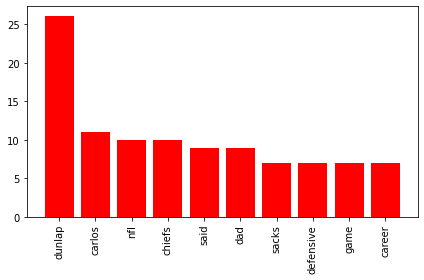

In [117]:
import numpy as np
import matplotlib.pyplot as plt

word, frequency = zip(*top_tokens)

indices = np.arange(len(top_tokens))
plt.bar(indices, frequency, color='r')
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.show()

The most common words in this article are dunlap, carlos, nfl, and chiefs.  Dunlap is far and away the most common word. The most common range of the top ten words is in the 7 to 10 word range.

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [120]:
my_doc = nlp(text)

# Remove stop words and punctuation symbols
words = [token.lemma_.lower() for token in my_doc
         if not token.is_stop and not token.is_punct and not token.text=='\n' and not token.text.isnumeric()]
word_freq = Counter(words)
# 5 commonly occurring lemmas with their frequencies
common_lemmas = word_freq.most_common(10)
top_lemmas = common_lemmas
#print ('The top lemmas are: ',top_lemmas)

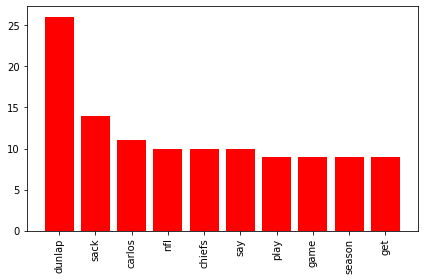

In [121]:
import numpy as np
import matplotlib.pyplot as plt

word, frequency = zip(*top_lemmas)

indices = np.arange(len(top_lemmas))
plt.bar(indices, frequency, color='r')
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.show()

The most common lemmas in this article are dunlap, sack, carlos, NFL, chiefs, and say.  Like the tokens, Dunlap is far and away the most common lemma. The most common range of the top ten lemmas is between 8-10.

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

The top 10 tokens that would be omitted for being nouns are dad, sacks, game, career, sack, season, father, time, team, and end.  
The top 10 lemmas that would be omitted for being nouns are sack, game, season, dad, career, father, time, player, team, end.

to only consider nouns, I added token.pos_ == 'NOUN' to my selection.  

In [127]:
#for token in my_doc:
#    if token.pos_ == 'NOUN':
#        print(token.text, token.lemma_, token.pos_)

from collections import Counter

my_doc = nlp(text)

# Remove stop words and punctuation symbols
words = [token.text.lower() for token in my_doc
         if not token.is_stop and not token.is_punct and not token.text=='\n' and not token.text.isnumeric() and token.pos_ == 'NOUN']

word_freq = Counter(words)

# 20 commonly occurring words with their frequencies
common_words = word_freq.most_common(10)
top_tokens = common_words
print ('Omitted tokens are: ',top_tokens)

Omitted tokens are:  [('dad', 9), ('sacks', 7), ('game', 7), ('career', 7), ('sack', 7), ('season', 6), ('father', 6), ('time', 4), ('team', 4), ('end', 3)]


In [129]:
from collections import Counter

my_doc = nlp(text)

# Remove stop words and punctuation symbols
words = [token.lemma_.lower() for token in my_doc
         if not token.is_stop and not token.is_punct and not token.text=='\n' and not token.text.isnumeric() and token.pos_ == 'NOUN']
word_freq = Counter(words)
# 5 commonly occurring lemmas with their frequencies
common_lemmas = word_freq.most_common(10)
top_lemmas = common_lemmas
print ('The top omitted lemmas are: ',top_lemmas)

The top omitted lemmas are:  [('sack', 14), ('game', 9), ('season', 9), ('dad', 9), ('career', 7), ('father', 6), ('time', 4), ('player', 4), ('team', 4), ('end', 3)]
